<a href="https://colab.research.google.com/github/TRANTHITHUYTIEN20104061/Tr-n-Th-Th-y-Ti-n-20104061/blob/main/ND_g%C6%B0%C6%A1ng_m%E1%BA%B7t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline
import pathlib 
from glob import glob
from tensorflow.keras.utils import image_dataset_from_directory
import warnings
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
labels = os.listdir("/content/drive/MyDrive/Colab Notebooks/BTND/Ban ")
labels

['TU', 'TUOI', 'TIÊN']

In [ ]:
tien_data = plt.imread('/content/drive/MyDrive/Colab Notebooks/BTND/Ban /TIÊN/z3862701290753_960a93220244a9ab8507a71189f0002e.jpg')
tien_data
tien_data.shape

(2560, 2560, 3)

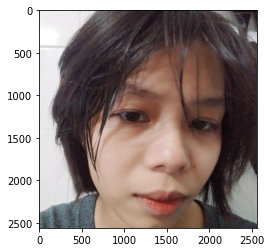

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread('/content/drive/MyDrive/Colab Notebooks/BTND/Ban /TIÊN/z3862719947649_d333647e65816ad51e4206afff428d50.jpg'))

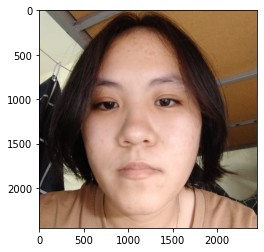

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread('/content/drive/MyDrive/Colab Notebooks/BTND/Ban /TU/Bản sao của IMG_20221026_224010.jpg'))

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/BTND/Ban '
data_dir = pathlib.Path(path)
data_dir

PosixPath('/content/drive/MyDrive/Colab Notebooks/BTND/Ban ')

In [ ]:
import cv2
def read_image(path):
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image
path

'/content/drive/MyDrive/Colab Notebooks/BTND/Ban '

In [ ]:
labels = ['TIÊN', 'TU', 'TUOI']
col_to_title = {'TIÊN': 'TIÊN', 'TU': 'TU', 'TUOI': 'TUOI'}

In [ ]:
ban_folder = '/content/drive/MyDrive/Colab Notebooks/BTND/Ban '
ban_folder

'/content/drive/MyDrive/Colab Notebooks/BTND/Ban '

In [ ]:
x_train = image_dataset_from_directory(ban_folder,validation_split=0.3,subset="validation",seed=2210,image_size=(128,128),batch_size=32)
x_test = image_dataset_from_directory(ban_folder,validation_split=0.3,subset="validation",seed=2210,image_size=(128,128),batch_size=32)

Found 178 files belonging to 3 classes.
Using 53 files for validation.
Found 178 files belonging to 3 classes.
Using 53 files for validation.


In [ ]:
class_name=x_train.class_names
class_name

['TIÊN', 'TU', 'TUOI']

In [ ]:
import tensorflow as tf 

AUTOTUNE = tf.data.AUTOTUNE
x_train = x_train.cache().shuffle(buffer_size=1000).prefetch(buffer_size=AUTOTUNE)
x_test = x_test.cache().shuffle(buffer_size=1000).prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_layer=Sequential([layers.RandomFlip(mode='horizontal',input_shape=(128,128,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)],name='data_layer')
num_classes=len(class_name)
num_classes

3

In [ ]:
model=Sequential([ data_layer,
    layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"),
    layers.MaxPooling2D(),
    
    layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    
    layers.Dropout(rate=0.2),
    layers.Flatten(),
    
    layers.Dense(units=128, activation="relu"),
    layers.Dense(units=num_classes)])

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_layer (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)       

In [ ]:
history = model.fit(x = x_train, epochs = 50, validation_data = x_test)

Epoch 1/50


2/2 [==============================] - 33s 2s/step - loss: 290.3788 - accuracy: 0.2264 - val_loss: 588.0536 - val_accuracy: 0.3585
Epoch 2/50
2/2 [==============================] - 0s 89ms/step - loss: 469.7932 - accuracy: 0.3585 - val_loss: 171.1291 - val_accuracy: 0.3585
Epoch 3/50
2/2 [==============================] - 0s 149ms/step - loss: 86.0257 - accuracy: 0.3962 - val_loss: 31.7343 - val_accuracy: 0.3774
Epoch 4/50
2/2 [==============================] - 0s 143ms/step - loss: 33.9689 - accuracy: 0.4151 - val_loss: 40.0663 - val_accuracy: 0.2642
Epoch 5/50
2/2 [==============================] - 0s 139ms/step - loss: 29.8998 - accuracy: 0.2642 - val_loss: 15.3804 - val_accuracy: 0.2642
Epoch 6/50
2/2 [==============================] - 0s 141ms/step - loss: 8.5473 - accuracy: 0.4340 - val_loss: 1.8555 - val_accuracy: 0.6792
Epoch 7/50
2/2 [==============================] - 0s 151ms/step - loss: 2.2034 - accuracy: 0.6981 - val_loss: 0.1488 - val_accuracy: 0.9623
Epoch 8/50
2/2 [====

2/2 [==============================] - 0s 9ms/step - loss: 0.8228 - accuracy: 0.8491
Test accuracy: [0.8227837085723877, 0.849056601524353]
2/2 [==============================] - 0s 8ms/step - loss: 0.8228 - accuracy: 0.8491
Test accuracy: [0.8227837085723877, 0.849056601524353]
2/2 [==============================] - 0s 8ms/step - loss: 0.8228 - accuracy: 0.8491
Test accuracy: [0.8227837085723877, 0.849056601524353]
2/2 [==============================] - 0s 9ms/step - loss: 0.8228 - accuracy: 0.8491
Test accuracy: [0.8227837085723877, 0.849056601524353]
2/2 [==============================] - 0s 12ms/step - loss: 0.8228 - accuracy: 0.8491
Test accuracy: [0.8227837085723877, 0.849056601524353]
2/2 [==============================] - 0s 8ms/step - loss: 0.8228 - accuracy: 0.8491
Test accuracy: [0.8227837085723877, 0.849056601524353]
2/2 [==============================] - 0s 9ms/step - loss: 0.8228 - accuracy: 0.8491
Test accuracy: [0.8227837085723877, 0.849056601524353]
2/2 [==============

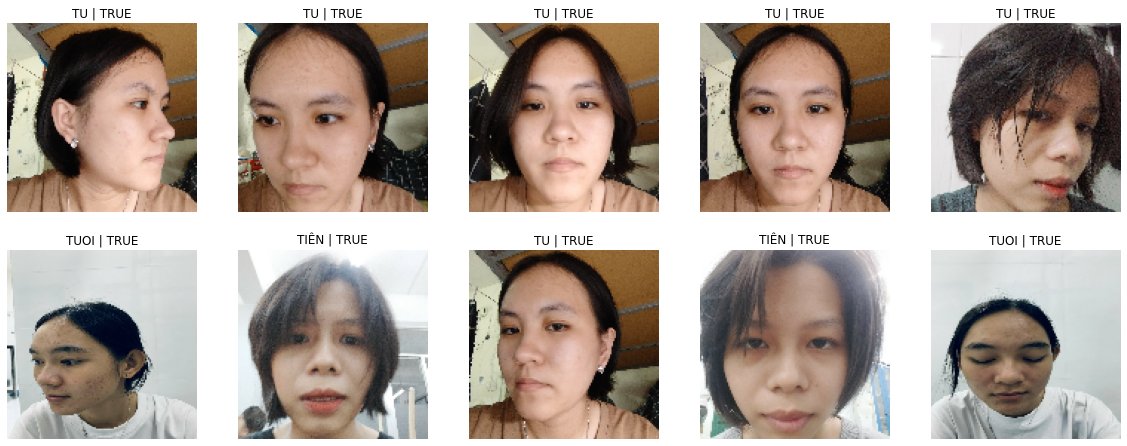

In [ ]:
plt.figure(figsize=(20, 16))
class_names = ['TIÊN', 'TU', 'TUOI']
for images, labels in x_test.take(1):
    for i in range(10):
        ax = plt.subplot(4, 5, i + 1)
        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'
            test_acc=model.evaluate(x_test)
            print('Test accuracy:',test_acc)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class]+result )
        plt.axis("off")